In [1]:
import sys
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython 
import sklearn
from sklearn.model_selection import train_test_split

import warnings
#warnings.filterwarnings("ignore")

## 3.5.4 Clustering Test

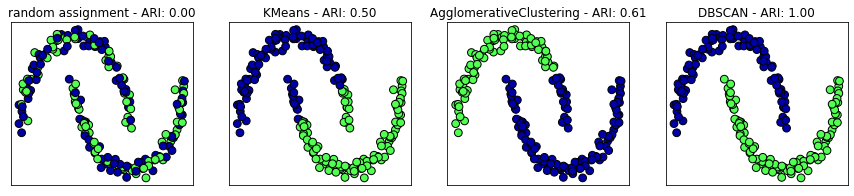

In [8]:
# Adjusted Rand Score (ARI)
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                        subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
              cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
        adjusted_rand_score(y, clusters)))

In [10]:
from sklearn.metrics import accuracy_score

clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

print("accuracy:", accuracy_score(clusters1, clusters2))
print("Adjusted Rand Score:", adjusted_rand_score(clusters1, clusters2))

accuracy: 0.0
Adjusted Rand Score: 1.0


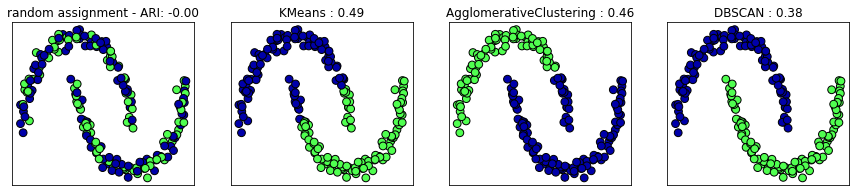

In [12]:
#Silhouette Score
from sklearn.metrics import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                        subplot_kw={'xticks': (), 'yticks': ()})

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("random assignment - ARI: {:.2f}".format(
        silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
              cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
        silhouette_score(X_scaled, clusters)))

In [16]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

In [18]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("unique label:", np.unique(labels))

unique label: [-1]


In [20]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("unique label:", np.unique(labels))

unique label: [-1]


In [22]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("unique label:", np.unique(labels))

unique label: [-1  0]


In [23]:
print("the number of point for each cluster:", np.bincount(labels + 1))

the number of point for each cluster: [  32 2031]


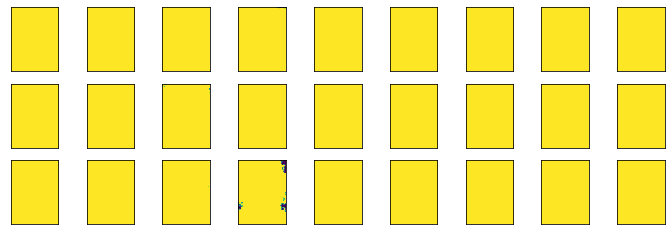

In [25]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                        figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [26]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("/neps=",eps)
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("the number of clusters:", len(np.unique(labels)))
    print("the size of clusters:", np.bincount(labels + 1))

/neps= 1
the number of clusters: 1
the size of clusters: [2063]
/neps= 3
the number of clusters: 1
the size of clusters: [2063]
/neps= 5
the number of clusters: 1
the size of clusters: [2063]
/neps= 7
the number of clusters: 14
the size of clusters: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]
/neps= 9
the number of clusters: 4
the size of clusters: [1307  750    3    3]
/neps= 11
the number of clusters: 2
the size of clusters: [ 413 1650]
/neps= 13
the number of clusters: 2
the size of clusters: [ 120 1943]


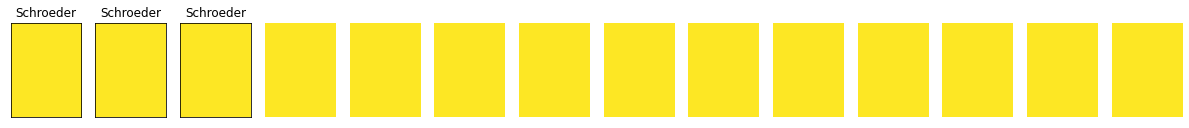

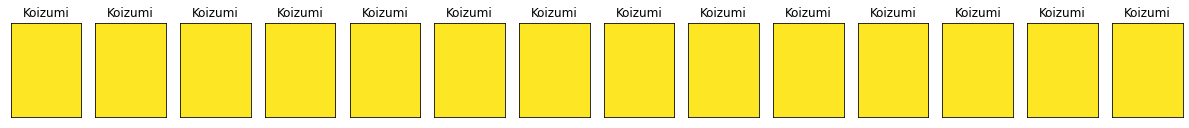

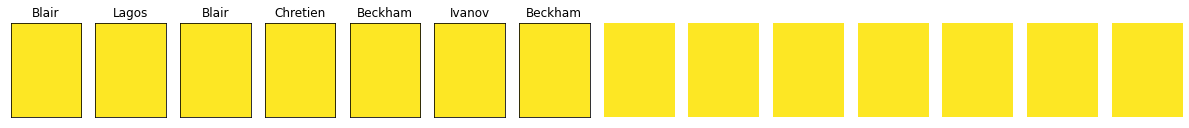

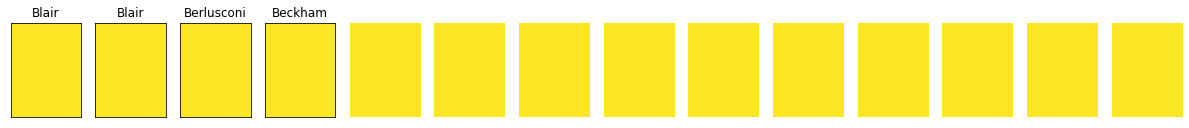

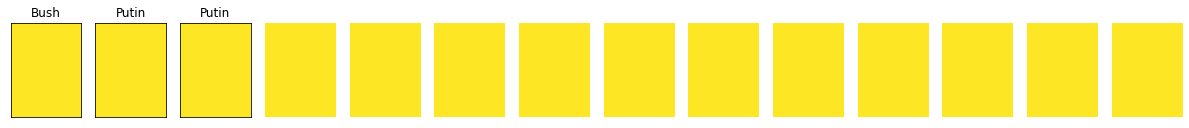

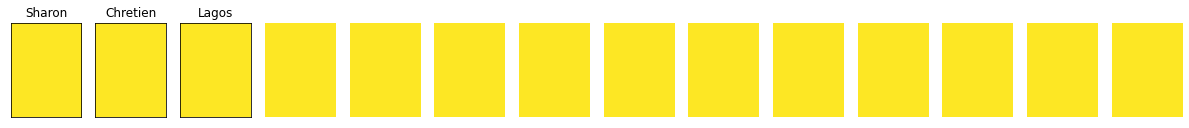

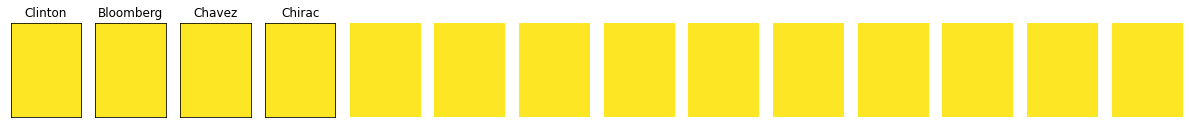

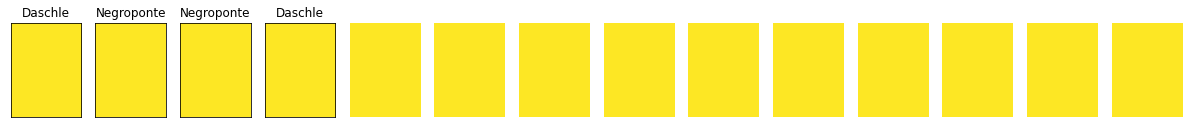

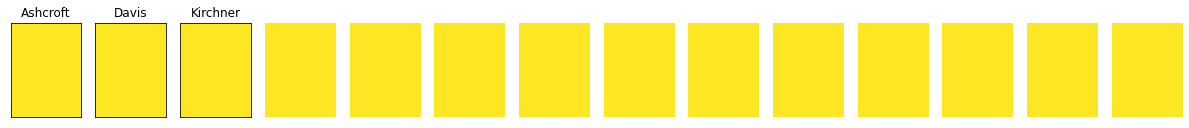

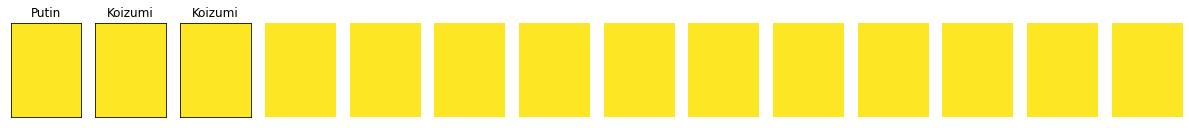

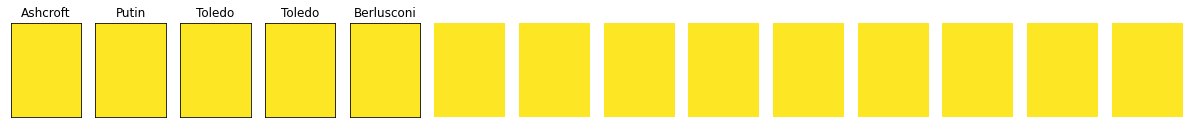

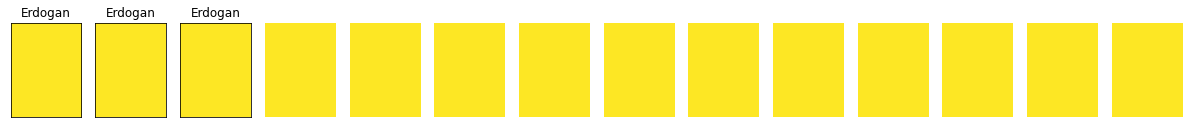

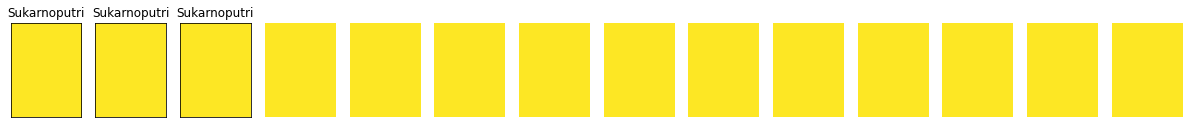

In [27]:
# look into eps=7
dbscan = DBSCAN(eps=7, min_samples=3)
labels = dbscan.fit_predict(X_pca)
    
for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, 14, figsize=(14*1.5, 4),
                            subplot_kw={'xticks': (), 'yticks': ()})
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
        i += 1
    for j in range(len(axes) - i):
        axes[j+i].imshow(np.array([[1]*65]*87), vmin=0, vmax=1)
        axes[j+i].axis('off')

### analyse face dataset with K-Means

In [28]:
km = KMeans(n_clusters=n_clusters, random_state=0)
labels_km = km.fit_predict(X_pca)
print("the size of clusters in k-means:", np.bincount(labels_km))

NameError: name 'n_clusters' is not defined

NameError: name 'km' is not defined

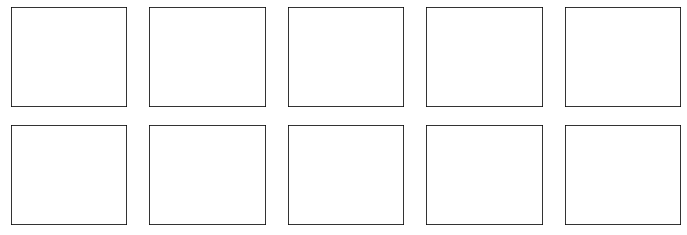

In [29]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
                        figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
             vmin=0, vmax=1)

In [ ]:
mglearn.plots.plt_kmeans_faces(km, pca, X_pca, X_people,
                              y_people, people.target_names)

### analyse face dataset with Agglomerative clustering

In [ ]:
agglomerative = AgglomerativeClusteringlusteringClustering(n_clusters=10)
labels_egg = agglomerative.fit_predict(X_pca)
print("the size of agglomerative clusters:", np.bincount(labels_egg))

In [ ]:
print("ARI:", adjusted_rand_score(labels_egg, labels_km))

In [ ]:
from scipy.cluster.hierarchy import dendrogram, ward

linkage_array = ward(X_pca)
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncated_mode='level', no_labels=True)
plt.xlabel("sample number")
plt.ylabel("cluster distance")
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [36, 36], '--', c='k')

In [ ]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_egg ==cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                            figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                     labels_egg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                    fontdict={'fontsize': 9})

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_egg = agglomerative.fit_predict(X_pca)
print("the size of agglomerative clusters:", np.bincount(labels_egg))

n_clusters = 40
for cluster in [13, 16, 23, 38, 39]:
    mask = labels_egg ==cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                            figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                     labels_egg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                    fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)